<a href="https://colab.research.google.com/github/Saiteja2903/Walmart-Sales-Analysis/blob/main/walmart(with_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0        2014Q4
1        2014Q1
2        2014Q4
3        2014Q1
4        2014Q4
          ...  
51285    2015Q2
51286    2014Q2
51287    2012Q3
51288    2013Q1
51289    2013Q2
Name: Quarter, Length: 51290, dtype: period[Q-DEC]
0     20121
1     20122
2     20123
3     20124
4     20131
5     20132
6     20133
7     20134
8     20141
9     20142
10    20143
11    20144
12    20151
13    20152
14    20153
15    20154
Name: Quarter_Num, dtype: int64
0     3.383628e+05
1     4.801328e+05
2     6.110859e+05
3     8.298693e+05
4     3.993677e+05
5     6.255929e+05
6     7.377689e+05
7     9.147092e+05
8     5.650196e+05
9     8.348395e+05
10    9.330370e+05
11    1.072850e+06
12    6.892067e+05
13    9.329870e+05
14    1.196483e+06
15    1.481189e+06
Name: Sales, dtype: float64
LinearRegression()
RandomForestRegressor(random_state=42)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/tmp/ipython-input-3-2951148821.py:106: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_quarters = pd.concat([past_df, future_df], ignore_index=True)


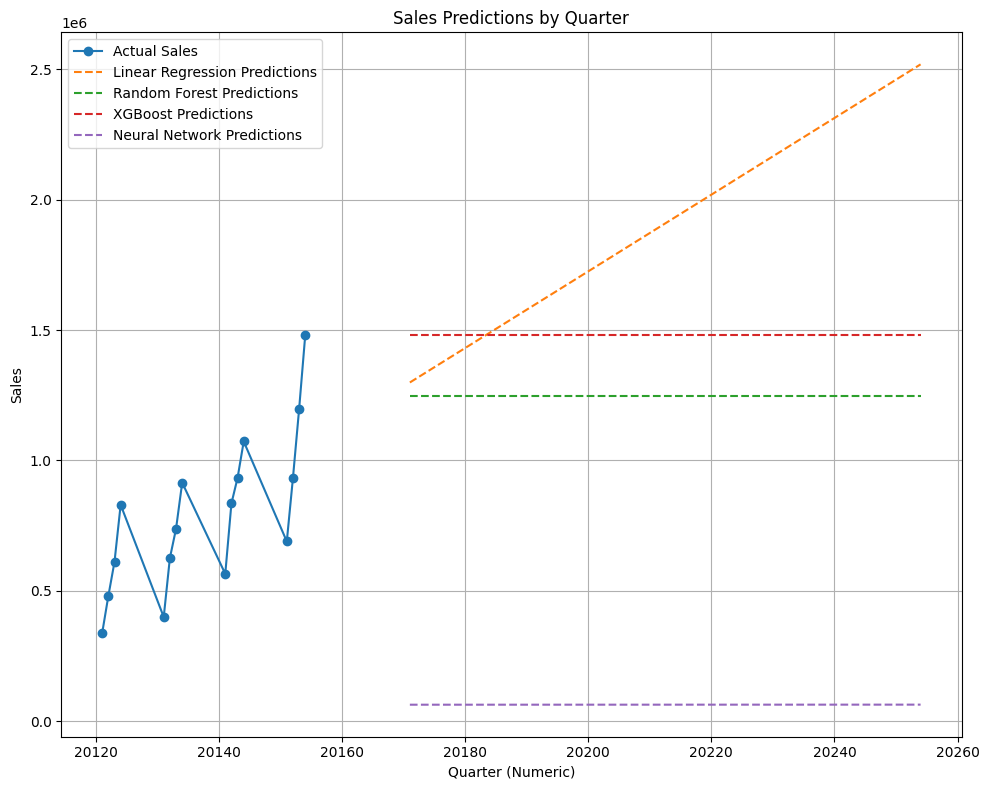

Linear Regression - MSE: 24219610087.13725 , R2: 0.7719435753240355
Random Forest - MSE: 38913784904.51636 , R2: 0.6335804489005096
XGBoost - MSE: 53033661162.65129 , R2: 0.5006250262198009
Neural Network - MSE: 462848349762.86475 , R2: -3.358267512743674


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the filepath for the dataset
file_path = '/content/drive/MyDrive/DA DOCS/DA SESSION DOCS/DA_WALL MART_pjt/DATA SET/Walmart Global Superstore_Dataset.xlsx'

# Load the dataset
data = pd.read_excel(file_path)

# Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year
data['Quarter'] = data['Order Date'].dt.to_period('Q')
print(data['Quarter'])
# Group by Quarter
quarterly_data = data.groupby('Quarter').agg({'Sales': 'sum'}).reset_index()
quarterly_data['Quarter'] = quarterly_data['Quarter'].astype(str)


# Convert Quarter to Quarter_Num
def convert_quarter(qtr):
    year, quarter_str = qtr.split('Q')
    return int(year) * 10 + int(quarter_str)


quarterly_data['Quarter_Num'] = quarterly_data['Quarter'].apply(convert_quarter)

# Prepare Training Data
X = quarterly_data[['Quarter_Num']]
y = quarterly_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(quarterly_data['Quarter_Num'])
print(quarterly_data['Sales'])
# Model Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2, predictions

# Linear Regression
lr_model = LinearRegression()
lr_mse, lr_r2, lr_predictions = evaluate_model(lr_model, X_train, y_train, X_test, y_test)
print(lr_model)
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_mse, rf_r2, rf_predictions = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
print(rf_model)
# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_mse, xgb_r2, xgb_predictions = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=1),
    Dense(64, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train, y_train, epochs=100, verbose=0)
nn_predictions = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

# Future Quarters
# Future Quarters
#last_qtr_num = quarterly_data['Quarter_Num'].max()
#future_quarters = pd.DataFrame({'Quarter_Num': [last_qtr_num + i for i in range(1, 13)]})

# Predictions
future_quarters = pd.DataFrame({'Quarter_Num': [year * 10 + qtr for year in range(2017, 2026) for qtr in range(1, 5)]})
future_predictions_lr = lr_model.predict(future_quarters)
future_predictions_lr = lr_model.predict(future_quarters)
future_predictions_rf = rf_model.predict(future_quarters)
future_predictions_xgb = xgb_model.predict(future_quarters)
future_predictions_nn = nn_model.predict(future_quarters)

# Combine Actual + Future
future_df = future_quarters.copy()
future_df['Actual Sales'] = np.nan
future_df['Sales_LR'] = future_predictions_lr
future_df['Sales_RF'] = future_predictions_rf
future_df['Sales_XGB'] = future_predictions_xgb
future_df['Sales_NN'] = future_predictions_nn.flatten()
past_df = quarterly_data[['Quarter_Num', 'Sales']].rename(columns={'Sales': 'Actual Sales'})
past_df['Sales_LR'] = np.nan
past_df['Sales_RF'] = np.nan
past_df['Sales_XGB'] = np.nan
past_df['Sales_NN'] = np.nan

all_quarters = pd.concat([past_df, future_df], ignore_index=True)
all_quarters = all_quarters.sort_values('Quarter_Num')


# Plot
plt.figure(figsize=(10, 8))
plt.plot(all_quarters['Quarter_Num'], all_quarters['Actual Sales'], label='Actual Sales', marker='o')
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_LR'], label='Linear Regression Predictions', linestyle='--')
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_RF'], label='Random Forest Predictions', linestyle='--')
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_XGB'], label='XGBoost Predictions', linestyle='--')
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_NN'], label='Neural Network Predictions', linestyle='--')
plt.xlabel('Quarter (Numeric)')
plt.ylabel('Sales')
plt.title('Sales Predictions by Quarter')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation
print("Linear Regression - MSE:", lr_mse, ", R2:", lr_r2)
print("Random Forest - MSE:", rf_mse, ", R2:", rf_r2)
print("XGBoost - MSE:", xgb_mse, ", R2:", xgb_r2)
print("Neural Network - MSE:", nn_mse, ", R2:", nn_r2)